<a href="https://colab.research.google.com/github/annasroka10/Python_final_project/blob/main/Python_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset
This dataset provides insights into the cost of living and average monthly income across various countries and regions worldwide from 2010 to 2023.
It includes critical economic indicators such as housing costs, taxes, healthcare, education, transportation expenses, and savings rates. The data is ideal for analyzing economic trends, regional comparisons, and financial planning.
Column Descriptions:


*   **Country:** The name of the country where the data was recorded.
*   **Region:** The geographical region to which the country belongs (e.g., Asia, Europe).
*   **Year:** The year when the data was recorded.
*   **Average_Monthly_Income:** The average monthly income of individuals in USD.
*   **Cost_of_Living:** The average monthly cost of living in USD, including essentials like housing, food, and utilities.
*   **Housing_Cost_Percentage:** The percentage of income spent on housing expenses.
*   **Tax_Rate:** The average tax rate applied to individuals' income, expressed as a percentage.
*   **Savings_Percentage:**The portion of income saved monthly, expressed as a percentage.
*   **Healthcare_Cost_Percentage:** The percentage of income spent on healthcare services.
*   **Education_Cost_Percentage:** The percentage of income allocated to educational expenses.
*   **Transportation_Cost_Percentage:** The percentage of income spent on transportation costs.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing data to Python.
df = pd.read_csv('Regional_Cost_of_Living_Analysis.csv')
df.head()

,Country,Year,Average_Monthly_Income in USD,Cost_of_Living in USD,Tax_Rate,Housing_Cost_Percentage,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage,Region
0,Australia,2010,7093.39,3678.66,20.73,47.28,17.63,17.90,11.71,16.49,Oceania
1,Brazil,2010,4808.55,3170.20,5.43,40.76,11.94,7.49,6.84,13.75,South America
2,Canada,2010,4014.11,1434.97,22.27,27.95,20.00,15.63,4.94,6.87,North America
3,Canada,2010,5194.19,2093.31,26.48,23.44,12.11,10.14,10.05,9.25,North America
4,Canada,2010,6634.75,6019.40,15.34,49.37,14.73,11.57,7.05,15.64,North America


# Inspecting and Cleaning Dataframe Structure

In [17]:
#Let's provide a summary of statistics for numeric columns in the DataFrame df.
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].apply(lambda x: round(x, 2)).values
    summ['Standard Deviation'] = [round(x, 2) for x in desc['std'].values]

    display(summ)

summary(df)

data shape: (294, 11)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation
Country,object,0,0.0,0,12,294,NaN,NaN,NaN,NaN
Year,int64,0,0.0,0,14,294,2010.0,2023.0,2016.58,3.97
Average_Monthly_Income in USD,float64,0,0.0,0,294,294,795.7,7976.56,5069.25,1804.32
Cost_of_Living in USD,float64,0,0.0,0,293,294,464.49,6996.13,3715.45,1972.78
Tax_Rate,float64,0,0.0,0,284,294,5.0,39.92,22.02,9.70
Housing_Cost_Percentage,float64,0,0.0,0,281,294,20.1,49.95,35.34,8.68
Savings_Percentage,float64,0,0.0,0,271,294,0.0,29.84,14.95,8.66
Healthcare_Cost_Percentage,float64,0,0.0,0,264,294,5.01,19.98,12.47,4.36
Education_Cost_Percentage,float64,0,0.0,0,262,294,2.08,14.94,8.54,3.88
Transportation_Cost_Percentage,float64,0,0.0,0,267,294,5.21,19.95,12.48,4.21


In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,294.0,2016.581633,3.968967,2010.00,2013.0000,2016.000,2020.0000,2023.00
Average_Monthly_Income in USD,294.0,5069.245816,1804.317818,795.70,3660.3050,5319.305,6577.7650,7976.56
Cost_of_Living in USD,294.0,3715.450612,1972.783454,464.49,1959.2850,3686.310,5399.6000,6996.13
Tax_Rate,294.0,22.021361,9.695832,5.00,14.9625,22.040,29.7300,39.92
Housing_Cost_Percentage,294.0,35.336327,8.680466,20.10,27.7150,35.700,42.8025,49.95
Savings_Percentage,294.0,14.953197,8.661917,0.00,7.7725,15.110,22.2350,29.84
Healthcare_Cost_Percentage,294.0,12.472959,4.360499,5.01,8.3350,12.505,16.5300,19.98
Education_Cost_Percentage,294.0,8.542109,3.875164,2.08,5.2250,8.510,11.8400,14.94
Transportation_Cost_Percentage,294.0,12.480102,4.213599,5.21,8.9200,12.475,15.9475,19.95


From the above descriptive statiscics, we can see that we're missing any data (Missing#, Missing%): all columns have 0 missing values, indicating the dataset is complete.

Also, we don't have any duplicated entries.

the year range is from 2010 to 2023, with average 2016.58, meaning most data points are around 2016.

Average Monthly Income in USD ranges from USD 795.7 to USD 7976.56 with the average of USD 5069.25.

Cost of Living is from USD 464.49 to USD 6996.13 with average of USD 3715.45, showing lower costs compared to income.

Average of the tax rate is 22.02%, suggesting a moderate average tax rate.
Standard Deviation: 9.7%, showing varied taxation levels across countries.


Standard Deviation of housing cost is at the level of 8.68%, indicating some variation in housing costs relative to income.

The average monthly income (USD 5069.25) is higher than the average cost of living ($3715.45), but both show significant variability.

High standard deviations in tax rates, income, and costs suggest diversity across the countries and regions represented.

This dataset could be useful for understanding economic disparities, budgeting, and cost of living analyses across countries and regions.

# Data Manipulation and Data Visualization

In [39]:
#Countries included in the region
countries_in_region = df.groupby('Region')['Country'].apply(lambda x: pd.unique(x).tolist())
print(countries_in_region)


Region
Africa                            [South Africa]
Asia                       [China, India, Japan]
Europe                 [Russia, France, Germany]
North America    [Canada, Mexico, United States]
Oceania                              [Australia]
South America                           [Brazil]
Name: Country, dtype: object


In [4]:
#Average of Cost_of_Living in USD per Country
avg_living_cost_per_country = df.pivot_table(values=['Average_Monthly_Income in USD',"Cost_of_Living in USD"], index="Country", aggfunc=np.mean).round(2)
avg_living_cost_per_country = avg_living_cost_per_country.sort_values(by=['Cost_of_Living in USD'], ascending=False)
print(avg_living_cost_per_country)

               Average_Monthly_Income in USD  Cost_of_Living in USD
Country                                                            
China                                5426.71                4508.11
Japan                                5383.68                3948.31
Russia                               5173.41                3909.22
Germany                              5057.91                3832.34
Mexico                               5094.65                3797.02
Brazil                               4778.92                3754.48
South Africa                         5359.90                3754.14
United States                        4380.97                3711.53
India                                4768.27                3562.65
Australia                            5012.57                3530.67
Canada                               5948.64                3134.40
France                               4734.24                3122.40


<ipython-input-4-418433d9b77a>:2: FutureWarning: The provided callable <function mean at 0x795cb05f95a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_living_cost_per_country = df.pivot_table(values=['Average_Monthly_Income in USD',"Cost_of_Living in USD"], index="Country", aggfunc=np.mean).round(2)


In [5]:
#Calculating ratio of Cost_of_Living in USD to Average_Monthly_Income in USD by adding a new column
df['Cost_of_Living_Ratio'] = (df['Cost_of_Living in USD'] / df['Average_Monthly_Income in USD']*100).round(2)
df.head()

,Country,Year,Average_Monthly_Income in USD,Cost_of_Living in USD,Tax_Rate,Housing_Cost_Percentage,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage,Region,Cost_of_Living_Ratio
0,Australia,2010,7093.39,3678.66,20.73,47.28,17.63,17.90,11.71,16.49,Oceania,51.86
1,Brazil,2010,4808.55,3170.20,5.43,40.76,11.94,7.49,6.84,13.75,South America,65.93
2,Canada,2010,4014.11,1434.97,22.27,27.95,20.00,15.63,4.94,6.87,North America,35.75
3,Canada,2010,5194.19,2093.31,26.48,23.44,12.11,10.14,10.05,9.25,North America,40.30
4,Canada,2010,6634.75,6019.40,15.34,49.37,14.73,11.57,7.05,15.64,North America,90.73


I have decided to focus my analysis on countries in North America. The countries included in this analysis are the United States, Mexico, and Canada.

In [6]:
#United States average monthly income and cost of living across the years.
US_over_years = df[(df['Country'] == 'United States')][['Year','Average_Monthly_Income in USD','Cost_of_Living in USD']]
US_over_years = US_over_years.groupby(by=['Year']).mean().round(2)
US_over_years

,Average_Monthly_Income in USD,Cost_of_Living in USD
Year,,
2010,4608.87,3577.32
2011,4480.86,4841.94
2012,4439.30,4265.27
2013,3506.39,2714.14
2014,3647.54,2627.40
2015,4750.67,3123.86
2016,3361.14,915.02
2018,5269.92,3919.55
2019,5126.59,5126.59


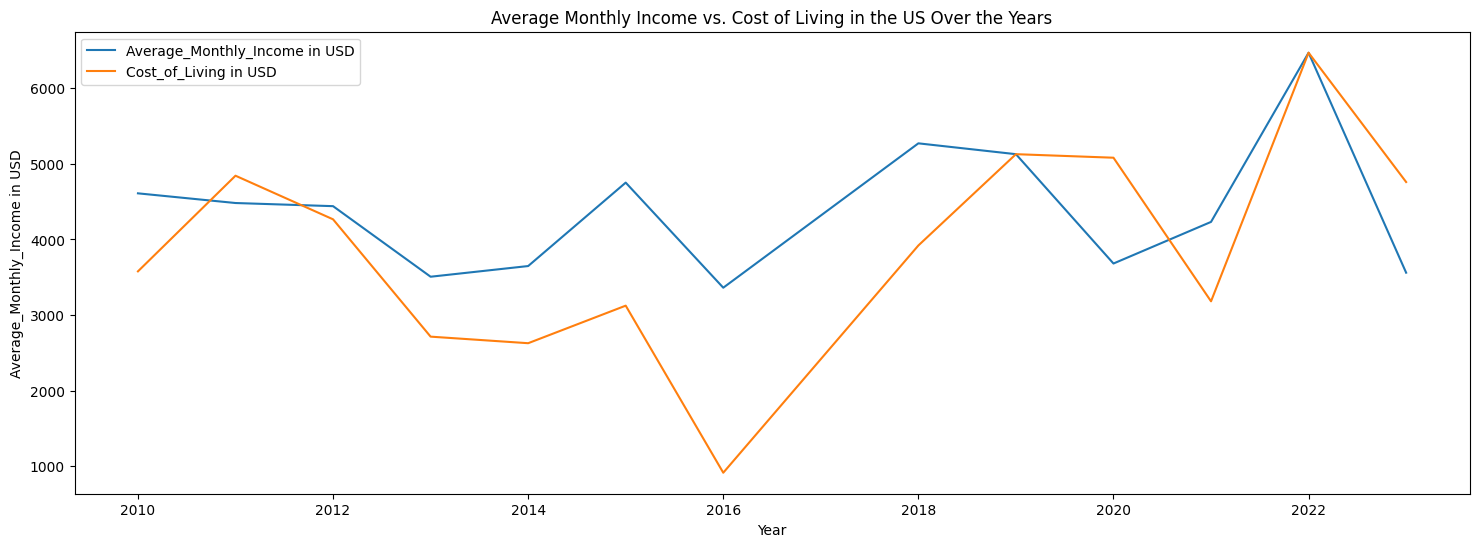

In [7]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=US_over_years, x='Year', y='Average_Monthly_Income in USD', label='Average_Monthly_Income in USD')
sns.lineplot(data=US_over_years, x='Year', y='Cost_of_Living in USD', label='Cost_of_Living in USD')
plt.title('Average Monthly Income vs. Cost of Living in the US Over the Years')
plt.show()

*Average Monthly Income vs. Cost of Living in the US Over the Years Key Points*

`Average Monthly Income:`

Highest: USD 6467.99 (2022)

Lowest: USD 3361.14 (2016)

General Trend: Fluctuates significantly over the years, with peaks in 2022 and dips around 2013 and 2016.

`Cost of Living:`

Highest: USD 6467.99 (2022)

Lowest: USD 915.02 (2016)

General Trend: Shows considerable variation, with a significant drop in 2016 but peaks in 2011, 2019, and 2022.

`Surplus Years:`

Years like 2010, 2014, 2015, and 2018 show a significant positive balance, where income exceeds cost of living by a notable margin.

`Deficit Years:`

In 2011, 2020, and 2023, cost of living surpasses income, indicating potential economic strain.

In [8]:
#The average percentage of income spent on housing expenses per countries in the USA.
countries_in = df[df['Region'] == 'North America'].groupby('Country')['Housing_Cost_Percentage'].mean().round(2)
countries_in = countries_in.sort_values(ascending=False)
print(countries_in)

Country
Mexico           36.71
Canada           36.09
United States    35.46
Name: Housing_Cost_Percentage, dtype: float64


The percentage of income spent on housing costs is similar across all three countries, accounting for approximately one-third of total income. This makes housing the most significant expense compared to other categories.

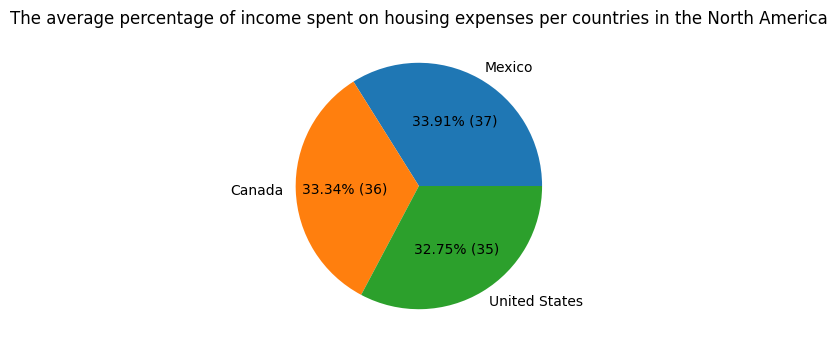

In [9]:
plt.figure(figsize=(4, 4))
plt.pie(countries_in, labels=countries_in.index,
        autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p / 100 * countries_in.sum()))
plt.title('The average percentage of income spent on housing expenses per countries in the North America')
plt.show()

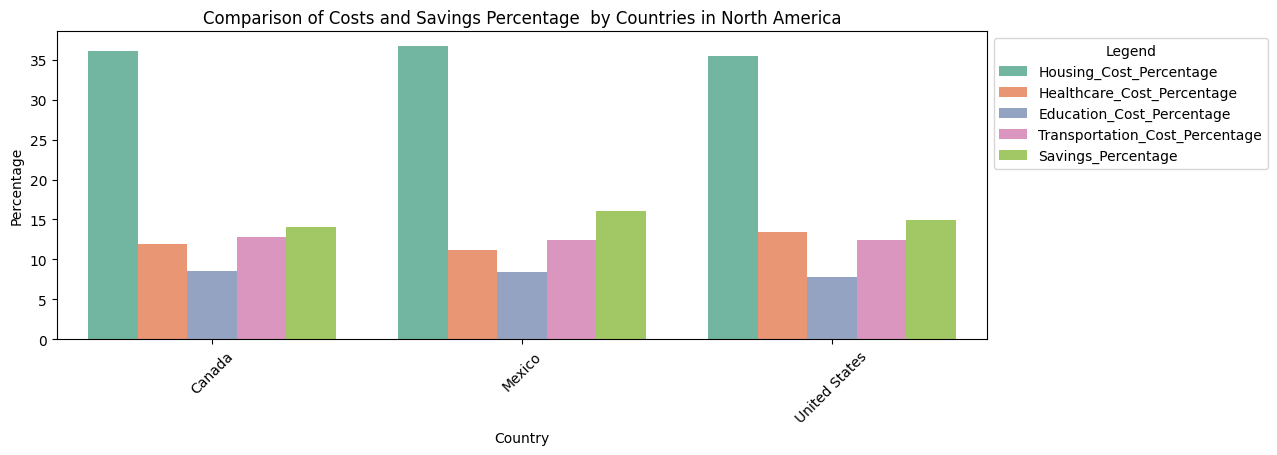

In [126]:
#Comparison of Costs and Savings Percentage by Country in North America
fig, ax = plt.subplots(figsize=(12, 4))
North_America_df = df[df['Country'].isin(['Canada','Mexico', 'United States'])]
df_melted = North_America_df.melt(id_vars=['Country'], value_vars=['Housing_Cost_Percentage', 'Healthcare_Cost_Percentage', 'Education_Cost_Percentage',
                                                   'Transportation_Cost_Percentage', 'Savings_Percentage'],  var_name='Feature', value_name='Measurement')
sns.barplot(x='Country', y='Measurement', hue='Feature', data=df_melted, palette='Set2', errorbar=None)
plt.title('Comparison of Costs and Savings Percentage  by Countries in North America')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Legend')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.xticks(rotation = 45)
plt.show()

As mentioned earlier, housing costs stand out as the most significant expense compared to other categories. The cost levels appear to be consistent across the three countries, showing minimal variation.

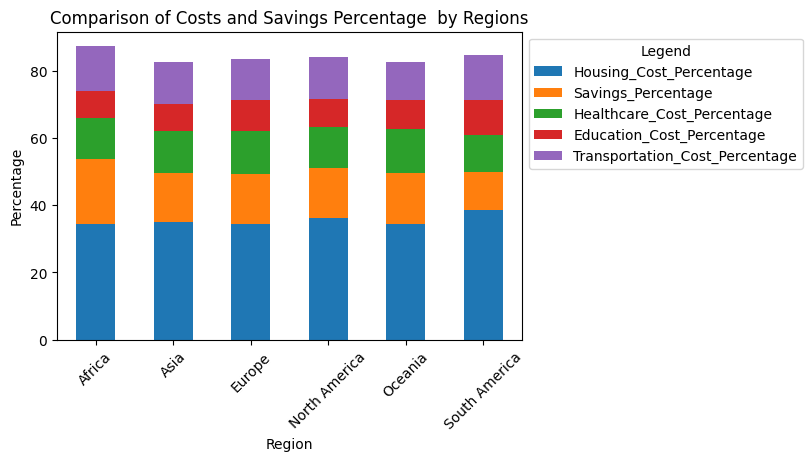

In [157]:
# Comparison of Costs and Savings Percentage by Regions
numerical_features = ['Housing_Cost_Percentage', 'Savings_Percentage',
                      'Healthcare_Cost_Percentage', 'Education_Cost_Percentage',
                      'Transportation_Cost_Percentage']
df_country = df.groupby(['Region'])[numerical_features].mean().round(2).reset_index()
df_country.plot(x="Region", kind = 'bar',stacked = 'True', figsize=(6, 4))
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Legend')
plt.title('Comparison of Costs and Savings Percentage  by Regions')
plt.ylabel('Percentage')
plt.xticks(rotation = 45)
plt.show()

In [10]:
import plotly.express as px
fig = px.choropleth(df,
                            locations='Country', locationmode='country names',
                            color = 'Average_Monthly_Income in USD',hover_name="Country",
                            animation_frame="Year",
                            title = f'Average_Monthly_Income in USD over the years',
                            color_continuous_scale='picnic_r')
fig.show()
i=0
fig.write_html(f"geo-{i}.html")